<a href="https://colab.research.google.com/github/SUGAMYA-k/PRODIGY_ML_02/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Load the dataset

In [ ]:
url = "Mall_Customers.csv"
data = pd.read_csv(url)
data.rename(columns=lambda x: x.strip(), inplace=True)  # Strip column names

Explore the dataset

In [ ]:
print(data.head())
print(data.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Data Cleaning

In [ ]:
# Drop CustomerID and any columns not needed
if 'CustomerID' in data.columns:
    data = data.drop('CustomerID', axis=1)
# Encode categorical data (e.g., Gender)
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
# Handle missing values (if any)
data = data.dropna()
# Ensure only numeric data
data = data.select_dtypes(include=[np.number])

# Check for an empty dataset
if data.empty:
    raise ValueError("The dataset is empty after preprocessing.")

Standardize the data

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Determine the optimal number of clusters using the Elbow Method

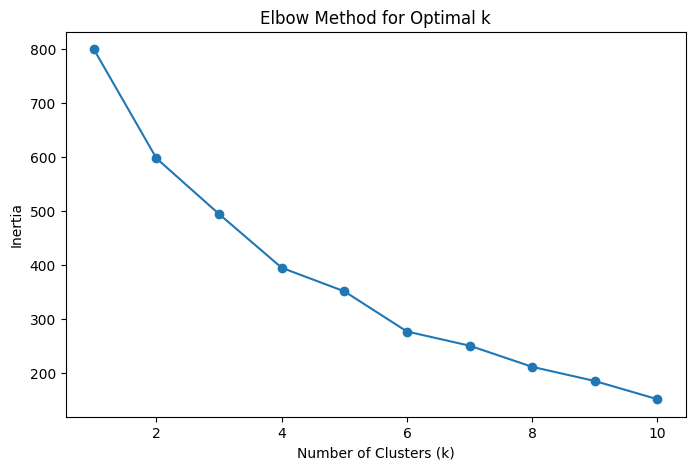

In [ ]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Fit the K-Means model with the optimal k (e.g., k=3 based on the Elbow Method)

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

 Assign clusters to the original data

In [ ]:
data['Cluster'] = kmeans.labels_

Visualize the clusters (e.g., using PCA for dimensionality reduction)

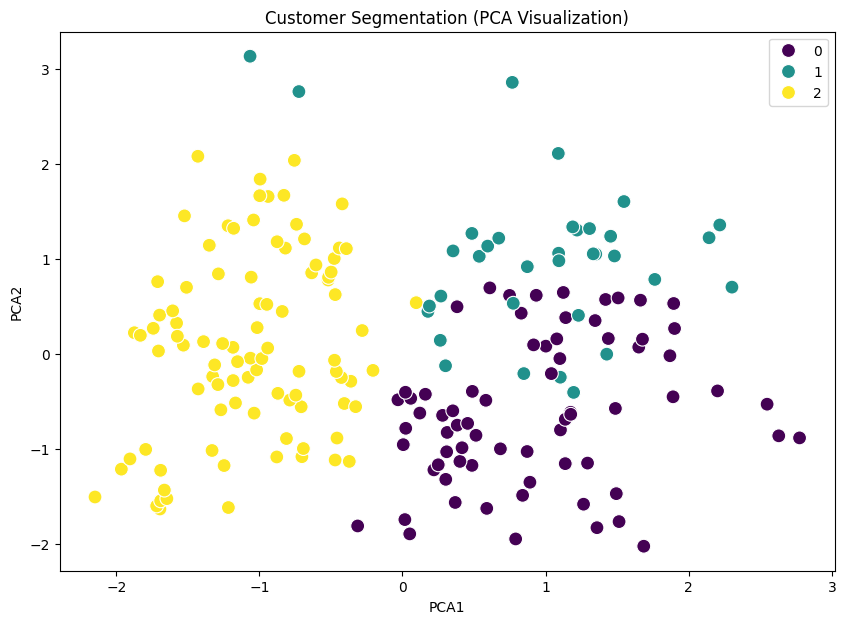

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100
)
plt.title('Customer Segmentation (PCA Visualization)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

Analyze the clusters

In [ ]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

# Save the cluster data for further use
data.to_csv('customer_segments.csv', index=False)


           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.605634  52.169014           46.676056               39.295775   
1        0.371429  40.228571           91.342857               20.628571   
2        0.595745  28.276596           59.585106               69.446809   

             PCA1      PCA2  
Cluster                      
0        0.930007 -0.605974  
1        0.938510  1.008544  
2       -1.051897  0.082182  
